In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- pH : 산
- Temprature : 온도
- Taste : 맛
- Odor : 향
- Fat	 : 지방
- Turbidity : 탁도
- Colour : 색깔
- Grade : 등급

In [2]:
milk = pd.read_csv('./data/milknew.csv',encoding='utf-8')
milk

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


#### milk 데이터셋 null값 및 구성 확인

In [3]:
milk.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [4]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
milk.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
# type이 'object'인 열들만 요약
milk.describe(include=object)

,Grade
count,1059
unique,3
top,low
freq,429


#### 상관 계수 확인
- 탁도(Turbidity) & 냄새(Odor) 가 가장 높음

In [7]:
milk.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


<AxesSubplot:>

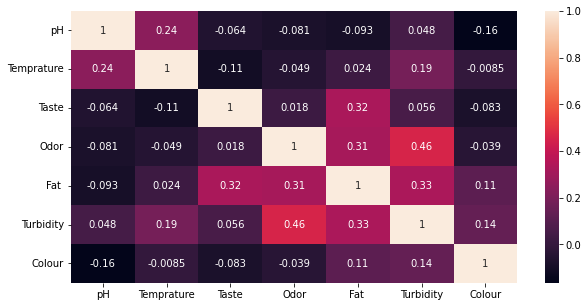

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(milk.corr(),annot=True)

#### 문자열로 되어있는 값을 숫자로 치환

In [9]:
milk.Grade.value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
milk.Grade = encoder.fit_transform(milk.Grade)

In [13]:
milk.head(3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1


In [14]:
milk.Grade.value_counts()

1    429
2    374
0    256
Name: Grade, dtype: int64

- 0 : high
- 1 : low
- 2 : medium

In [15]:
x = milk.drop(columns=['Grade'])
y = milk.Grade

In [16]:
y.value_counts()

1    429
2    374
0    256
Name: Grade, dtype: int64

#### 트레인 데이터와 테스트 데이터 분리

In [17]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(x,y)

In [18]:
from sklearn.neighbors import KNeighborsRegressor

#### over sampling 
- 데이터 세트를 증식 시킬 때 사용하는 방법, 원본 데이터의 피처값을 약간씩 변형하여 증식
- 학습데이터 세트만 오버 셈플링 해야한다

In [19]:
from imblearn.over_sampling import SMOTE

sample = SMOTE()

x,y = sample.fit_resample(x,y)

In [20]:
x

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1282,6.8,45,0,1,0,0,240
1283,6.7,41,1,0,0,0,247
1284,6.7,45,1,1,0,0,247
1285,6.5,36,0,0,1,0,255


In [21]:
y.value_counts()

0    429
1    429
2    429
Name: Grade, dtype: int64

#### Feature Scaling

- minmaxscaler : 데이터를 0과 1사이의 값으로 변환하는 방법 / 각 특성이 같은 범위를 가지도록 변환

- fit() : 데이터 변환을 위한 기준 정보를 설정 하는 역할
    - 표준화 : 각 열의 평균과 표준편차 값
    - 정규화 : 최댓값과 최솟값을 계산하여 저장

- transform() : fit()으로 설정된 정보를 이용하여 데이터를 변환
    - 표준화 : 평균을 빼고 표준편차로 나눔
    - 정규화 : 최솟값을 빼고 최댓값과 최솟값의 차이로 나눔

- fit_transform() : 테스트 데이터를 scaler의 정보수집에 포함
    - 테스트를 하기 전까지 어떤 상황에서도 사용되면 안됨 
    - 훈련데이터에서는 fit_transform()을 바로 사용할 수 있음
    - 테스트 데이터에서는 훈련 데이터에서 설정된 정보를 가지고 transform을 해야하기 때문에 사용할 수 없음

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

#### 로지스틱 회귀(LogisticRegression)
- 데이터가 특정 카테고리에 속할지를 0과 1사이의 연속적인 확률로 예측하는 회귀 알고리즘 중 하나

- score
    - test : 0.8735
    - train : 0.8881

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lgr = LogisticRegression()

In [27]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred = lgr.predict(x_test)

In [29]:
lgr.score(x_test,y_test)

0.8291925465838509

In [30]:
lgr.score(x_train,y_train)

0.8569948186528498

#### 성능 평가 모델
- confusion_matrix() / accuracy_score() / precision_score() / recall_score() / fbeta_score / f1_score() / classfication_report() / roc_curve / auc
- 사용할 모델 : confusion_matrix() / accuracy_score() / classfication_report()

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [32]:
confusion_matrix(y_test,y_pred)

array([[104,   6,   3],
       [ 20,  68,   8],
       [ 15,   3,  95]], dtype=int64)

In [33]:
# 정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율
# 높을수록 좋은 모형  
accuracy_score(y_test,y_pred)

0.8291925465838509

In [34]:
# precision : 정밀도 / 양성 클래스에 속한다고 출력한 샘플 중 양성 클래스에 속하는 샘플의 수의 비율
# recall : 재현율 / 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율
# f1 score : 정밀도와 재현율의 가중조화평균을 F점수(F-score)라고 함
#           정밀도에 주어지는 가중치(베타)
#           베타가 1인 경우 f1점수 라고 함 
# accuracy : 정확도
# macro : 단순 평균
# weighted : 각 클래스에 속하는 표본의 갯수 / 가중 평균
# 위 데이터는 'Grade'의 갯수를 맞춰놨기 때문에 단순 평균과 같음
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       113
           1       0.88      0.71      0.79        96
           2       0.90      0.84      0.87       113

    accuracy                           0.83       322
   macro avg       0.84      0.82      0.83       322
weighted avg       0.84      0.83      0.83       322



#### 교차 검증
- cross_var_score(model,x_data,y_data,scroring=평가지표,cv=교차 검증 폴드 수)

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cvs = cross_val_score(lgr,x,y,cv=5)

In [37]:
print(cvs)
print(cvs.mean())

[0.86821705 0.84108527 0.87937743 0.86381323 0.82879377]
0.8562573522758121


#### 과소적합 또는 과대 적합 없음

#### 최적합 모델 찾기

#### 선형회귀 모델을 사용
- score
    - test : 0.4945
    - train : 0.4582

-> 적합도 낮음

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
lr.score(x_test,y_test)

0.46603205199780606

In [41]:
lr.score(x_train,y_train)

0.4526071454922652

#### 최근접 회귀 모델을 사용
- score
    - test : 0.9909
    - train : 0.9926

-> 적합도 준수함

In [93]:
knr = KNeighborsRegressor()
# KNN 훈련
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [43]:
knr.score(x_test,y_test)

0.9934513274336283

In [44]:
knr.score(x_train,y_train)

0.9911392405063291

In [94]:
knr_pred = knr.predict(x_test)

In [92]:
len(knr_pred)

322

In [91]:
y_test

998     2
984     0
327     2
1002    2
926     1
       ..
179     0
432     1
360     0
183     1
329     1
Name: Grade, Length: 322, dtype: int32

In [95]:
print(classification_report(y_test,knr_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

#### 방법 선택 메서드 (method to use feature selection)

##### VarianceThreshold : 분산에 따라 변수를 선택

In [45]:
from sklearn.feature_selection import VarianceThreshold

In [46]:
# threshold : 훈련세트 분산이 임계 값보다 낮은 기능은 제거된다 / 모든 샘플에서 동일한 값을 갖는 기능을 제거한다
v = VarianceThreshold(threshold=1)

In [47]:
v.fit_transform(milk)

array([[  6.6,  35. , 254. ],
       [  6.6,  36. , 253. ],
       [  8.5,  70. , 246. ],
       ...,
       [  3. ,  40. , 255. ],
       [  6.8,  43. , 250. ],
       [  8.6,  55. , 255. ]])

In [48]:
v.get_support()

array([ True,  True, False, False, False, False,  True, False])

In [49]:
milk.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

##### 카이제곱을 사용하여 방법 선택 메서드
- chi2 : 카이 제곱 테스트는 확률적 변수 간의 의존성을 측정하므로 이 기능을 사용하면 클래스와 독립적일 가능성이 가장 높아 분류와 관련이 없는 기능을 "제거"한다
- SelectBest : k개의 가장 높은 점수에 따라 기능을 선택한다
- SelectPercentile : 최고 점수의 백분위수에 따라 기능을 선택한다
- f_classif : 제공된 샘플에 대한 ANOVA f-value를 계산한다. 
    
    (ANOVA : 
    
        - 두개이상 집단들의 평균간 차이에 대한 통계적 유의성을 검정

        - 사후 검정 : 분산분석 후 어떤 집단의 유의미한 차이를 가지고 있는지 확인

            - 귀무가설 : 집단들 사이의 평균이 같음
           
            - 대립가설 : 집단들 사이의 평균은 다름)

In [50]:
from sklearn.feature_selection import chi2,SelectKBest,SelectPercentile,f_classif

In [51]:
chi_best_col = SelectKBest(chi2,k=5)
kbest = chi_best_col.fit_transform(x,y)
np.array(milk.drop(columns='Grade').columns)[chi_best_col.get_support()]

array(['Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity'], dtype=object)

In [52]:
pd.DataFrame(list(zip(milk.drop(columns='Grade').columns,chi_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
5,Turbidity,183.402477
3,Odor,144.860465
4,Fat,111.714917
1,Temprature,54.775211
2,Taste,24.984743
6,Colour,9.923417
0,pH,0.079063


#### ANOVA method를 사용하여 특징을 선택하는 method

In [53]:
f_best_col = SelectKBest(f_classif,k=5)
kbest1 = f_best_col.fit_transform(x,y)
np.array(milk.drop(columns='Grade').columns)[f_best_col.get_support()]

array(['Temprature', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype=object)

In [54]:
pd.DataFrame(list(zip(milk.drop(columns='Grade'),f_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
4,Fat,265.353071
5,Turbidity,257.309937
1,Temprature,222.651563
3,Odor,172.178507
6,Colour,51.657381
2,Taste,29.648342
0,pH,0.578267


#### 5가지 매개변수를 이용하여 DecisionTreeClassifilter 적용

In [55]:
x1 = milk[['Temprature', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y1 = milk['Grade']

In [56]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.20)

#### DecisionTreeClassifier(결정트리분류자) 모델을 사용
- score
    - test : 0.9909
    - train : 0.9926

-> 적합도 준수함

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc = DecisionTreeClassifier()

In [59]:
dtc.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [60]:
y1_pred = dtc.predict(x1_test)

In [61]:
dtc.score(x1_test,y1_test)

0.8726415094339622

In [62]:
dtc.score(x1_train,y1_train)

0.89728453364817

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        47
           1       0.91      0.90      0.91        96
           2       0.95      0.88      0.92        69

    accuracy                           0.87       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.88      0.87      0.88       212



#### 이전의 모델에서 최고의 정확도를 얻음

#### 의사결정트리(DecisionTreeClassifier)의 5가지 모델 조합을 사용하여 교차 확인하고 싶음 

In [65]:
# 교차 검증으로 점수를 평가

from sklearn.model_selection import cross_val_score

In [67]:
# fit 할때 사용한 모델
# x : fit할 데이터
# y : 예측 하는 결과 값1
# cv : 교차 검증 분할 전략 결정, 
#   default: 5중 교차 검증

cvs = cross_val_score(dtc,x1,y1,cv=5)

In [69]:
print(cvs)
print(cvs.mean())

[0.88207547 0.88679245 0.89150943 0.87264151 0.88151659]
0.8829070911204507


#### 하이퍼 매개변수(hyper parameter)를 사용하여 모델의 정확도를 상승

In [72]:
# criterion : 표준

param_dict = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,10)
}

In [73]:
# 추정된 매개변수 값에 대한 철저한 검색
# 'fit', 'score' 방법을 구현함
# max_depth의 값마다 각각 학습 해줘야하는 것을 대신 해서 최적의 max_depth 값을 찾아줌

from sklearn.model_selection import GridSearchCV

In [74]:
grid = GridSearchCV(dtc,param_grid=param_dict,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

In [75]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [76]:
grid.best_score_

0.9896373056994818

#### 최적합 모델 적용

In [77]:
dtcp = DecisionTreeClassifier(criterion='gini',max_depth=9)

In [78]:
dtcp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [79]:
y1p_pred = dtcp.predict(x_test)

In [80]:
print(classification_report(y_test,y1p_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       113
           1       1.00      0.99      0.99        96
           2       0.99      0.98      0.99       113

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [81]:
cvs1 = cross_val_score(dtcp,x,y,cv=5)

In [82]:
print(cvs1)
print(cvs1.mean())

[0.97674419 0.98449612 0.9922179  0.9922179  0.9922179 ]
0.9875788013151148


#### RandomForestClassifier 적용

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier()

In [85]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
yr_pred = rfc.predict(x_test)

In [87]:
print(classification_report(y_test,yr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      0.99      0.99        96
           2       0.99      1.00      1.00       113

    accuracy                           1.00       322
   macro avg       1.00      1.00      1.00       322
weighted avg       1.00      1.00      1.00       322



In [103]:
# classification_report 사용시 적합한 모델을 사용 하여야 함 모든 모델에서 적용가능 x

print(classification_report(y_test,knr_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [104]:
cvsr = cross_val_score(rfc,x,y,cv=5)

In [105]:
print(cvsr)
print(cvsr.mean())

[0.99612403 1.         1.         1.         0.9922179 ]
0.9976683859680874


### RandomForestClassifier 모델을 이용하여 underfiting 이나 overfiting 없는 99% 정확도를 가진 모델이 되었다